In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "../backtest/new_data/prices_round_1_day_0.csv"

df = pd.read_csv(path, delimiter=';')
df_a = df[df['product'] == 'AMETHYSTS']
df_s = df[df['product'] == 'STARFRUIT']

df_s.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
5,0,200,STARFRUIT,5037,1,5036.0,21.0,NaN,NaN,5043,1,5044.0,21.0,NaN,NaN,5040.0,0.0
6,0,300,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5044,25,NaN,NaN,NaN,NaN,5040.5,0.0
9,0,400,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5042,6,5044.0,25.0,NaN,NaN,5039.5,0.0


In [36]:
s_mid = df_s['mid_price'].values

n_back = 50
X = []
Y = []
for i in range(len(s_mid)-n_back):
    X.append(s_mid[i:i+n_back])
    Y.append(s_mid[i+n_back])

print(X[0], Y[0])
print(X[1], Y[1])

# fit a linear regression model from numpy

X = np.array(X)
Y = np.array(Y)

print(X.shape, Y.shape)

X = np.c_[X, np.ones(X.shape[0])]
print(X[0], Y[0])



[5039.5 5042.  5040.  5040.5 5039.5 5040.5 5040.5 5040.  5039.5 5039.5
 5040.  5040.5 5040.  5036.5 5039.5 5042.  5040.  5038.5 5040.  5039.5
 5036.5 5039.5 5039.5 5040.  5042.5 5039.5 5038.5 5037.5 5041.5 5038.5
 5038.  5038.  5038.  5037.5 5037.5 5037.5 5038.  5036.  5036.5 5037.5
 5038.  5038.  5038.  5038.  5039.  5039.  5038.  5036.5 5036.5 5036.5] 5035.0
[5042.  5040.  5040.5 5039.5 5040.5 5040.5 5040.  5039.5 5039.5 5040.
 5040.5 5040.  5036.5 5039.5 5042.  5040.  5038.5 5040.  5039.5 5036.5
 5039.5 5039.5 5040.  5042.5 5039.5 5038.5 5037.5 5041.5 5038.5 5038.
 5038.  5038.  5037.5 5037.5 5037.5 5038.  5036.  5036.5 5037.5 5038.
 5038.  5038.  5038.  5039.  5039.  5038.  5036.5 5036.5 5036.5 5035. ] 5038.5
(9950, 50) (9950,)
[5.0395e+03 5.0420e+03 5.0400e+03 5.0405e+03 5.0395e+03 5.0405e+03
 5.0405e+03 5.0400e+03 5.0395e+03 5.0395e+03 5.0400e+03 5.0405e+03
 5.0400e+03 5.0365e+03 5.0395e+03 5.0420e+03 5.0400e+03 5.0385e+03
 5.0400e+03 5.0395e+03 5.0365e+03 5.0395e+03 5.0395e+03 5

In [48]:
s_mid = df_s['mid_price'].values



n_back = 50
def get_mse(n_back):
    
    X = []
    Y = []
    for i in range(len(s_mid)-n_back):
        X.append(s_mid[i:i+n_back])
        Y.append(s_mid[i+n_back])
    
    # print(X[0], Y[0])
    # print(X[1], Y[1])
    
    # fit a linear regression model from numpy
    
    X = np.array(X)
    Y = np.array(Y)
    
    # print(X.shape, Y.shape)
    
    X = np.c_[X, np.ones(X.shape[0])]
    # print(X[0], Y[0])
    
    
    
    # fit a linear regression model from numpy
    model = np.linalg.lstsq(X, Y, rcond=None)
    pred = np.dot(X, model[0])
    weights = model[0]
    mse = (Y - np.dot(X, model[0])) @ (Y - np.dot(X, model[0])) / len(Y)
    return mse

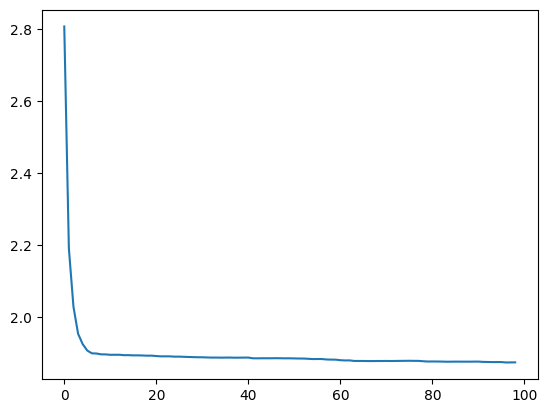

In [49]:
mses = []
for i in range(1, 100):
    mses.append(get_mse(i))
    
# now plot:
plt.plot(mses)

In [ ]:

X = []
Y = []
for i in range(len(s_mid)-n_back):
    X.append(s_mid[i:i+n_back])
    Y.append(s_mid[i+n_back])

# print(X[0], Y[0])
# print(X[1], Y[1])

# fit a linear regression model from numpy

X = np.array(X)
Y = np.array(Y)

# print(X.shape, Y.shape)

X = np.c_[X, np.ones(X.shape[0])]
# print(X[0], Y[0])
    


# fit a linear regression model from numpy
model = np.linalg.lstsq(X, Y, rcond=None)

In [51]:
df_s.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
5,0,200,STARFRUIT,5037,1,5036.0,21.0,NaN,NaN,5043,1,5044.0,21.0,NaN,NaN,5040.0,0.0
6,0,300,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5044,25,NaN,NaN,NaN,NaN,5040.5,0.0
9,0,400,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5042,6,5044.0,25.0,NaN,NaN,5039.5,0.0


In [58]:
# pairs price, timestamp
s_bid = df_s[['bid_price_1', 'timestamp']]
s_ask = df_s[['ask_price_1', 'timestamp']]


In [90]:
n_forward = 20

# mark as good these bids that could be sold later

margin = 1

good_bids = []
for t in range(len(s_bid)-n_forward):
    for forw in range(1, n_forward):
        if s_bid['bid_price_1'].values[t] > s_ask['ask_price_1'].values[t+forw]+ margin:
            # print(f'sell at {s_bid["bid_price_1"].values[t]}, time {s_bid["timestamp"].values[t]}')
            # print(f'buy at {s_ask["ask_price_1"].values[t+forw]}, time {s_ask["timestamp"].values[t+forw]} (+{forw})')
            good_bids.append(s_bid['timestamp'].values[t])
            break
           
print(len(good_bids))
print(len(good_bids) / len(s_bid))

good_asks = []
for t in range(len(s_ask)-n_forward):
    for forw in range(1, n_forward):
        if s_ask['ask_price_1'].values[t] < s_bid['bid_price_1'].values[t+forw] - margin:
            # print(f'buy at {s_ask["ask_price_1"].values[t]}, time {s_ask["timestamp"].values[t]}')
            # print(f'sell at {s_bid["bid_price_1"].values[t+forw]}, time {s_bid["timestamp"].values[t+forw]} (+{forw})')
            # print("---")
            good_asks.append(s_ask['timestamp'].values[t])
            break
            
print(len(good_asks))
print(len(good_asks) / len(s_ask))


1122
0.1122
1100
0.11


In [91]:
# now create a collumn in the dataframe that marks the good bids and asks
df_s['good_bid'] = df_s['timestamp'].apply(lambda x: x in good_bids)
df_s['good_ask'] = df_s['timestamp'].apply(lambda x: x in good_asks)

df_s

/tmp/ipykernel_34405/3159542527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['good_bid'] = df_s['timestamp'].apply(lambda x: x in good_bids)
/tmp/ipykernel_34405/3159542527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['good_ask'] = df_s['timestamp'].apply(lambda x: x in good_asks)


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,good_bid,good_ask
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0,False,False
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0,True,False
5,0,200,STARFRUIT,5037,1,5036.0,21.0,NaN,NaN,5043,1,5044.0,21.0,NaN,NaN,5040.0,0.0,False,False
6,0,300,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5044,25,NaN,NaN,NaN,NaN,5040.5,0.0,False,False
9,0,400,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5042,6,5044.0,25.0,NaN,NaN,5039.5,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0,False,False
19992,0,999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0,False,False
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0,False,False
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0,False,False


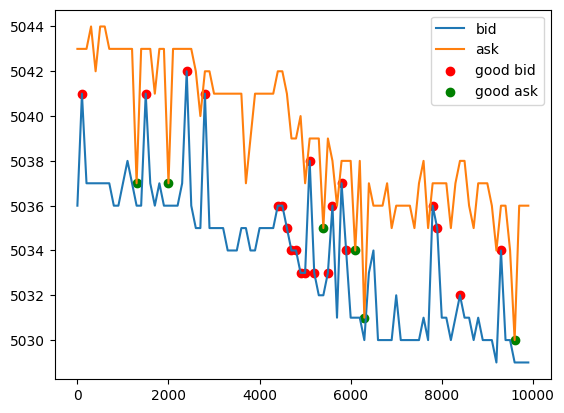

In [92]:
min_time= 0
max_time = 100

# now plot the bid price and ask price and mark the good bids and asks
plt.plot(df_s['timestamp'][min_time:max_time], df_s['bid_price_1'][min_time:max_time], label='bid')
plt.plot(df_s['timestamp'][min_time:max_time], df_s['ask_price_1'][min_time:max_time], label='ask')
plt.scatter(df_s['timestamp'][min_time:max_time][df_s['good_bid'][min_time:max_time]], df_s['bid_price_1'][min_time:max_time][df_s['good_bid'][min_time:max_time]], color='red', label='good bid')
plt.scatter(df_s['timestamp'][min_time:max_time][df_s['good_ask'][min_time:max_time]], df_s['ask_price_1'][min_time:max_time][df_s['good_ask'][min_time:max_time]], color='green', label='good ask')
plt.legend()
plt.show()

In [94]:
# fit a logistic regression model to predict good bids and asks
from sklearn.linear_model import LogisticRegression

X = df_s
Y_bid = df_s[['good_bid']]
model = LogisticRegression()

model.fit(X, Y)

ValueError: could not convert string to float: 'STARFRUIT'